In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirPath = os.path.abspath(os.path.dirname(''))
data_file='wyznaczanie_f(s) - Arkusz1.csv'
with open(os.path.join(dirPath, data_file), 'r') as file:
    data = pd.read_csv(file, dtype={'steering_angle':np.float64, 'd[cm]':np.float64}, decimal=',')
    
L = 33 #meters
steering_angle = data['steering_angle'].dropna()
d = data['d[cm]'].dropna()

delta_measured = np.arctan((2*L)/d)
data

,steering_angle,d[cm],kafelki,reszta,Unnamed: 4,Unnamed: 5
0,-0.100,-821.5,27,11.5,NaN,NaN
1,-0.125,-684.0,22,24.0,NaN,NaN
2,-0.150,-573.0,19,3.0,NaN,NaN
3,-0.200,-419.0,14,-1.0,NaN,NaN
4,-0.250,-338.0,11,8.0,NaN,NaN
5,-0.300,-280.5,9,10.5,NaN,NaN
6,-0.350,-241.5,8,1.5,NaN,NaN
7,-0.400,-208.0,7,-2.0,NaN,NaN
8,-0.450,-181.5,6,1.5,NaN,NaN
9,-0.550,-143.5,5,-6.5,NaN,NaN


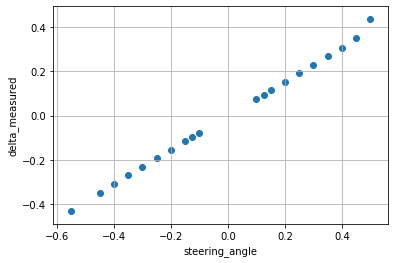

In [166]:
plt.scatter(steering_angle, delta_measured)
plt.xlabel('steering_angle')
plt.ylabel('delta_measured')
plt.grid('true')
path = '/home/marcel/catkin_ws/src/dynamic-model-car-simulator/angle_data.csv'

import csv
with open(path, 'w+') as file:
    csv_writer = csv.writer(file, delimiter=',')
    csv_writer.writerow(['steering_angle', 'delta_measured'])
    for (angle, measured) in zip(steering_angle, delta_measured):
        csv_writer.writerow([angle, measured])


In [165]:
[delta_measured, steering_angle]
from scipy import interpolate

y = steering_angle
x = delta_measured
f = interpolate.interp1d(x, y)

xnew = np.arange(-0.4, 0.4 , 0.01)
ynew = f(-0.3)   # use interpolation function returned by `interp1d`
#plt.plot(x, y, 'o', xnew, ynew, '-')
#plt.show()
ynew


array(-0.39103436)

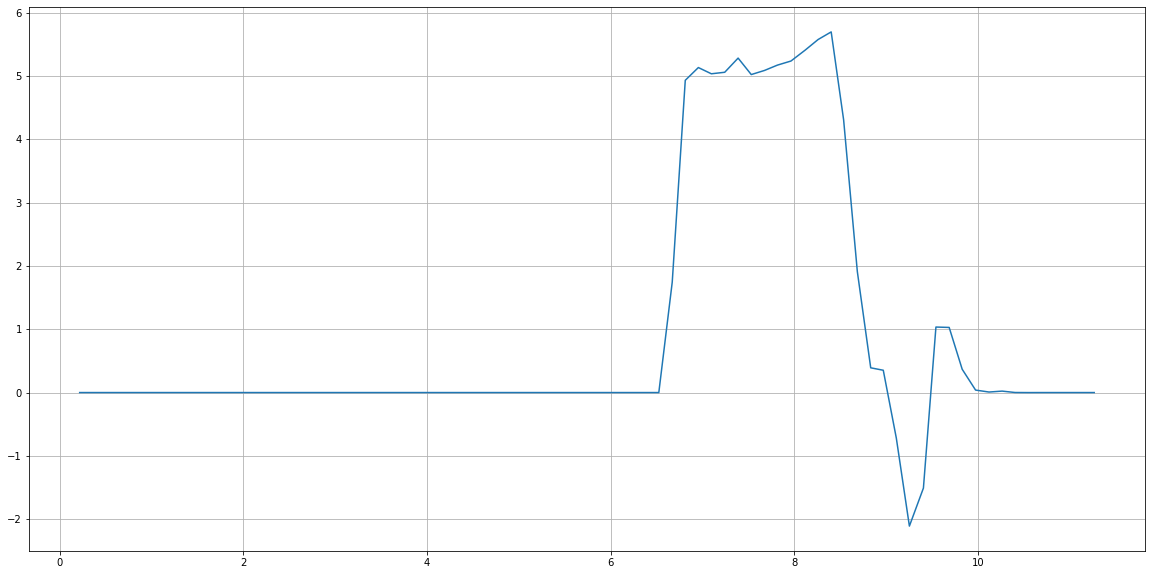

In [177]:

file_name = 'speed_data.csv'
with open('/home/marcel/catkin_ws/src/performance_monitor/scripts/speed_data.csv', 'r') as file:
    data = pd.read_csv(file)

speed = data['speed']
t = data['time']
plt.figure(figsize=(20,10))
plt.plot(t, speed)
plt.grid('true')

In [210]:
##speed turn measurements
data_file='speed_turn_measurements - Arkusz1.csv'
with open(os.path.join(dirPath, data_file), 'r') as file:
    data = pd.read_csv(file, dtype={'t[s]':np.float64, 'delta':np.float64}, decimal=',')
    
L = 33 #cm
steering_angle = data['delta']
time = data['t[s]']
S = [2*np.pi*L/np.tan(delta) for delta in steering_angle]

speed_file = 'speed_angle_ratio_data.csv'


delta_measured = np.arctan((2*L)/d)
data['speed_measured'] = S/data['t[s]']

speed_data = pd.DataFrame()
speed_data['delta'] = data['delta']
speed_data['speed_measured'] = data['speed_measured']/100

with open(os.path.join(dirPath, speed_file), 'w+') as file:
    speed_data.to_csv(file)

data

,t[s],delta,speed,speed_measured
0,5.66,0.40,1,86.646169
1,6.00,0.35,1,94.670744
2,7.05,0.30,1,95.076651
3,8.31,0.25,1,97.717121
4,10.33,0.20,1,99.018932
5,13.80,0.15,1,99.414343


Text(0, 0.5, 'speed_measured')

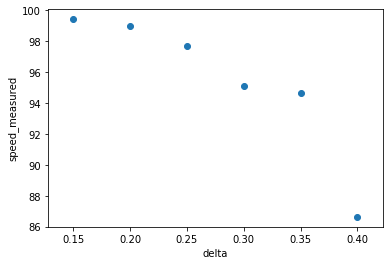

In [191]:
plt.scatter(data['delta'], data['speed_measured'])
plt.xlabel('delta')
plt.ylabel('speed_measured')

Text(0, 0.5, '')

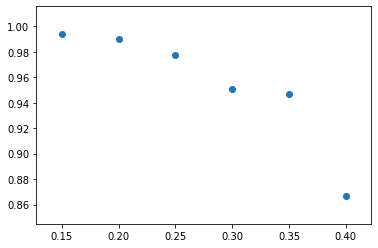

In [205]:
from scipy import interpolate

stm_speed = np.linspace(0, 4, num=10)
stm_2_real_speed_ratio = data['speed_measured']/100
f = interpolate.interp1d(data['delta'], stm_2_real_speed_ratio, fill_value='extrapolate')
stm_2_real_speed_ratio
plt.scatter(data['delta'], f(data['delta']))
plt.xlabel('')
plt.ylabel('')